# Annotator Competence Analysis

This notebook analyzes how annotator competences evolved over time, examining:
- Distribution of changes in annotations
- Differences between annotator groups
- Correlations between certainty and quality metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load data
data_path = Path("annotated_results_full.csv")
df = pd.read_csv(data_path)

# Convert certainty text values to numeric scale
certainty_mapping = {
    'Niska pewność': 1,
    'Umiarkowana pewność': 2,
    'Wysoka pewność': 3,
    'Całkowita pewność': 4
}

df['first_question_10_certainty'] = df['first_question_10_certainty'].map(certainty_mapping)
df['repeated_question_10_certainty'] = df['repeated_question_10_certainty'].map(certainty_mapping)

# Define numeric columns that should be float
numeric_cols = [
    'first_question_3_intention_clarity',
    'repeated_question_3_intention_clarity',
    'reaction_semantic_similarity',
    'intention_semantic_similarity',
    'reaction_evolution_assessment_quality_change',
    'intention_evolution_assessment_quality_change',
    'reaction_types_analysis_before_types_emocjonalne',
    'reaction_types_analysis_before_types_kognitywne',
    'reaction_types_analysis_before_types_behawioralne_manifestacje',
    'reaction_types_analysis_before_types_zewnętrzne_wyniki',
    'reaction_types_analysis_after_types_emocjonalne',
    'reaction_types_analysis_after_types_kognitywne',
    'reaction_types_analysis_after_types_behawioralne_manifestacje',
    'reaction_types_analysis_after_types_zewnętrzne_wyniki'
]

# Convert numeric columns to proper types
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate certainty change immediately after loading
df['certainty_change'] = df['repeated_question_10_certainty'] - df['first_question_10_certainty']

print(f"Loaded {len(df)} rows with {len(df.columns)} columns")
print(f"\nCertainty mapping applied:")
print(f"  Niska pewność → 1")
print(f"  Umiarkowana pewność → 2")
print(f"  Wysoka pewność → 3")
print(f"  Całkowita pewność → 4")
print(f"\nCertainty value distribution:")
print(f"  First question: {df['first_question_10_certainty'].value_counts().sort_index().to_dict()}")
print(f"  Repeated question: {df['repeated_question_10_certainty'].value_counts().sort_index().to_dict()}")
print(f"\nColumns: {list(df.columns[:10])}...")  # Show first 10 columns

## 1. Data Overview

In [18]:
# Basic statistics
print("Dataset shape:", df.shape)
print("\nAnnotator groups:")
print(df['annotator_group'].value_counts())
print("\nNumber of unique annotators:", df['annotator'].nunique())
print("\nMissing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Dataset shape: (750, 53)

Annotator groups:
annotator_group
komunikacja    150
rodzic         150
psycholog      150
nauczyciel     150
nastolatek     150
Name: count, dtype: int64

Number of unique annotators: 25

Missing values:
first_question_4_intention                73
repeated_question_4_intention             60
first_question_9_reaction                204
repeated_question_9_reaction             198
first_question_10_certainty               33
repeated_question_10_certainty            11
first_question_3_intention_clarity        59
repeated_question_3_intention_clarity     69
dtype: int64


## 2. Reaction analysis - quality change distribution

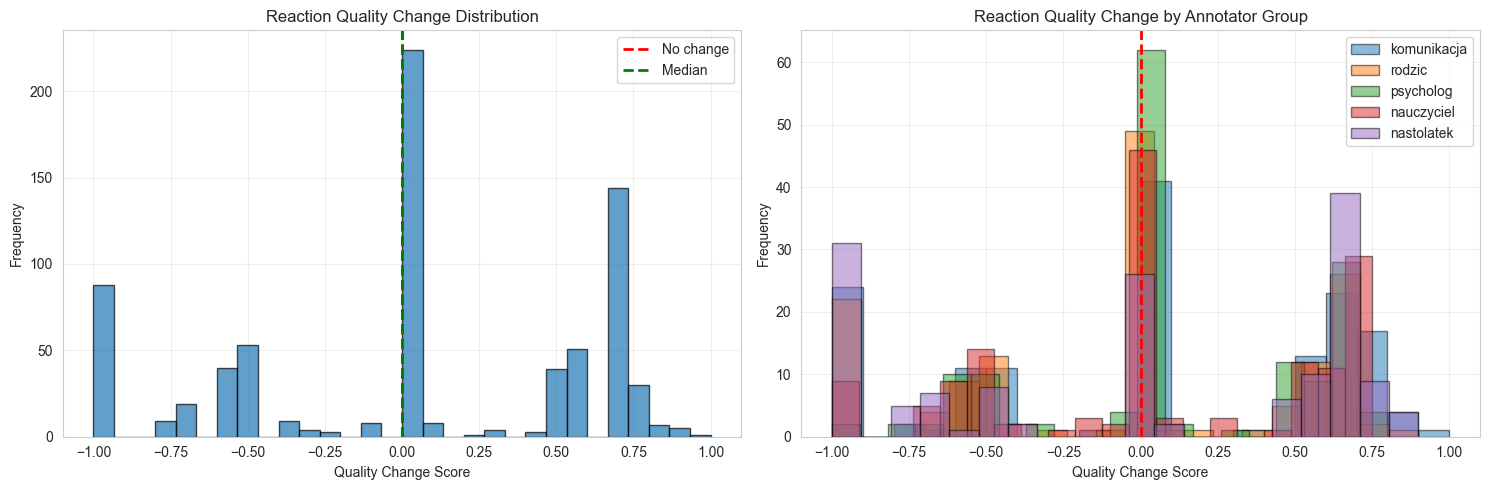

Reaction Quality Change Statistics:
count    750.000000
mean       0.030333
std        0.587074
min       -1.000000
25%       -0.500000
50%        0.000000
75%        0.600000
max        1.000000
Name: reaction_evolution_assessment_quality_change, dtype: float64

Improvement rate: 39.1%
Decline rate: 31.1%
No change rate: 29.9%


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall distribution
axes[0].hist(df['reaction_evolution_assessment_quality_change'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[0].axvline(df['reaction_evolution_assessment_quality_change'].median(), 
                color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Quality Change Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Reaction Quality Change Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# By annotator group (overlaid)
for group in df['annotator_group'].unique():
    group_data = df[df['annotator_group'] == group]['reaction_evolution_assessment_quality_change']
    axes[1].hist(group_data, bins=20, alpha=0.5, label=f'{group}', edgecolor='black')

axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Quality Change Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Reaction Quality Change by Annotator Group')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("Reaction Quality Change Statistics:")
print(df['reaction_evolution_assessment_quality_change'].describe())
print(f"\nImprovement rate: {(df['reaction_evolution_assessment_quality_change'] > 0).mean():.1%}")
print(f"Decline rate: {(df['reaction_evolution_assessment_quality_change'] < 0).mean():.1%}")
print(f"No change rate: {(df['reaction_evolution_assessment_quality_change'] == 0).mean():.1%}")

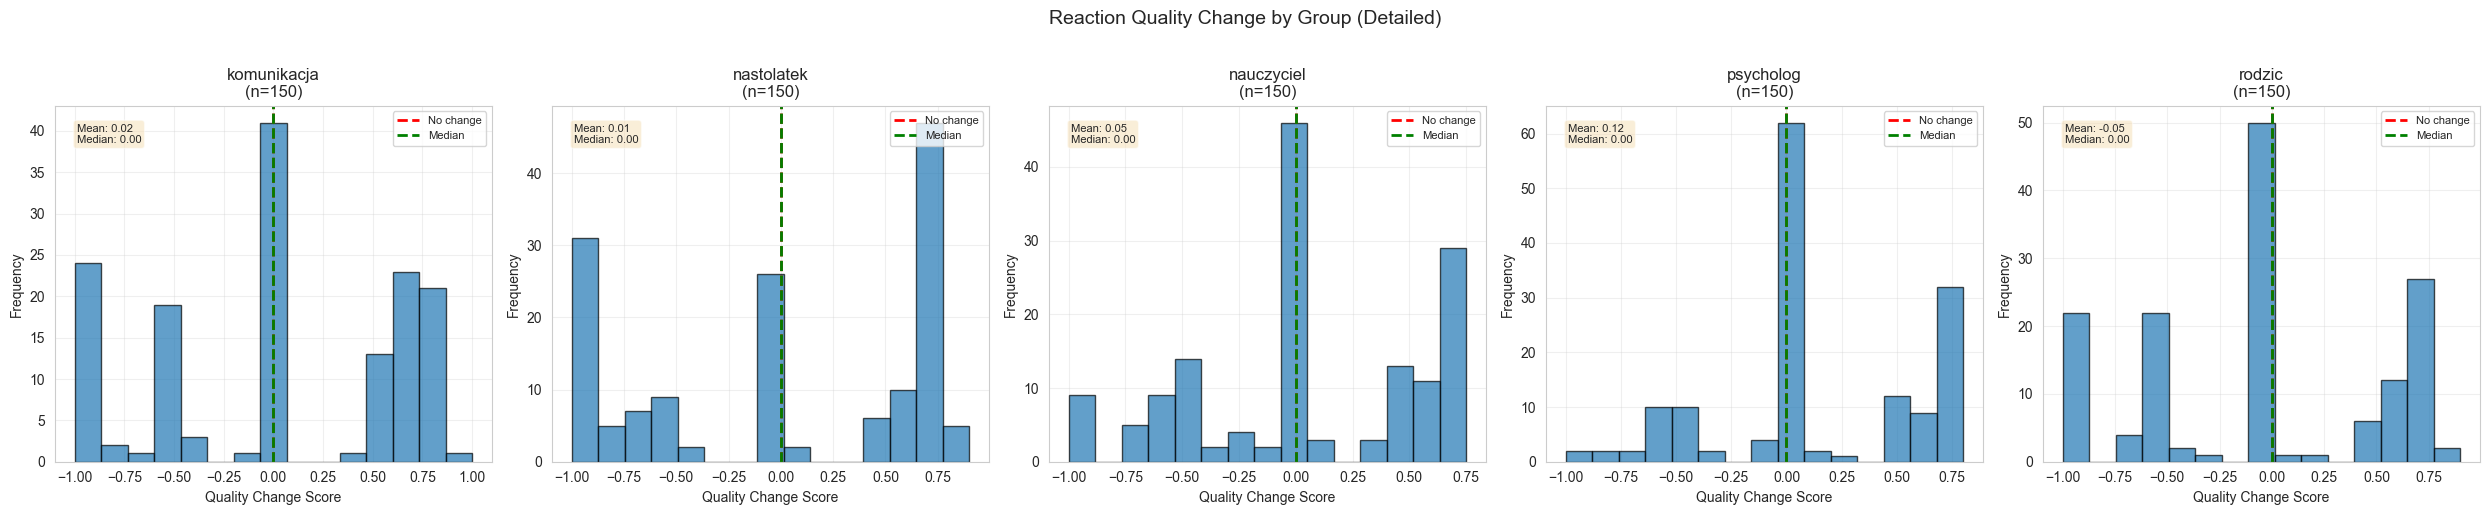

In [20]:
# Detailed per-group analysis for Reaction Quality Change
groups = sorted(df['annotator_group'].unique())
n_groups = len(groups)
fig, axes = plt.subplots(1, n_groups, figsize=(5*n_groups, 5))

if n_groups == 1:
    axes = [axes]

for idx, group in enumerate(groups):
    group_data = df[df['annotator_group'] == group]['reaction_evolution_assessment_quality_change']
    
    axes[idx].hist(group_data, bins=15, edgecolor='black', alpha=0.7)
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
    axes[idx].axvline(group_data.median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[idx].set_xlabel('Quality Change Score')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{group}\n(n={len(group_data)})')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)
    
    # Add stats text
    stats_text = f'Mean: {group_data.mean():.2f}\nMedian: {group_data.median():.2f}'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=8)

plt.suptitle('Reaction Quality Change by Group (Detailed)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 3. Intention analysis - quality change distribution

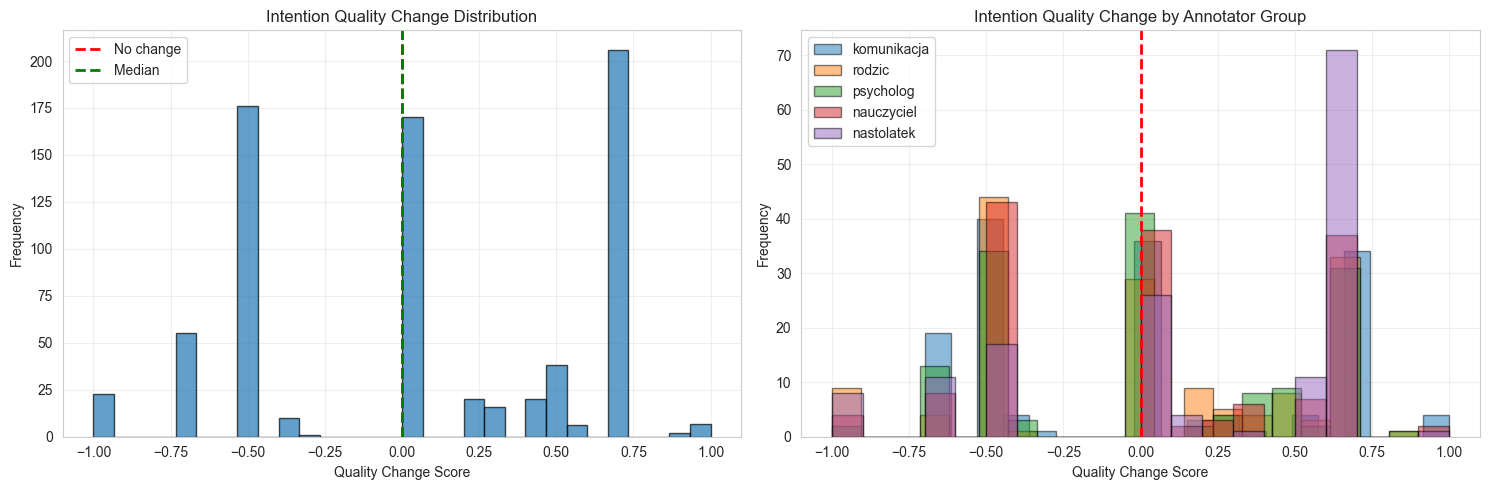

Intention Quality Change Statistics:
count    750.000000
mean       0.051467
std        0.542350
min       -1.000000
25%       -0.500000
50%        0.000000
75%        0.700000
max        1.000000
Name: intention_evolution_assessment_quality_change, dtype: float64

Improvement rate: 42.0%
Decline rate: 35.3%
No change rate: 22.7%


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Overall distribution
axes[0].hist(df['intention_evolution_assessment_quality_change'], bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[0].axvline(df['intention_evolution_assessment_quality_change'].median(), 
                color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Quality Change Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Intention Quality Change Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

# By annotator group (overlaid)
for group in df['annotator_group'].unique():
    group_data = df[df['annotator_group'] == group]['intention_evolution_assessment_quality_change']
    axes[1].hist(group_data, bins=20, alpha=0.5, label=f'{group}', edgecolor='black')

axes[1].axvline(0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Quality Change Score')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Intention Quality Change by Annotator Group')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistics
print("Intention Quality Change Statistics:")
print(df['intention_evolution_assessment_quality_change'].describe())
print(f"\nImprovement rate: {(df['intention_evolution_assessment_quality_change'] > 0).mean():.1%}")
print(f"Decline rate: {(df['intention_evolution_assessment_quality_change'] < 0).mean():.1%}")
print(f"No change rate: {(df['intention_evolution_assessment_quality_change'] == 0).mean():.1%}")

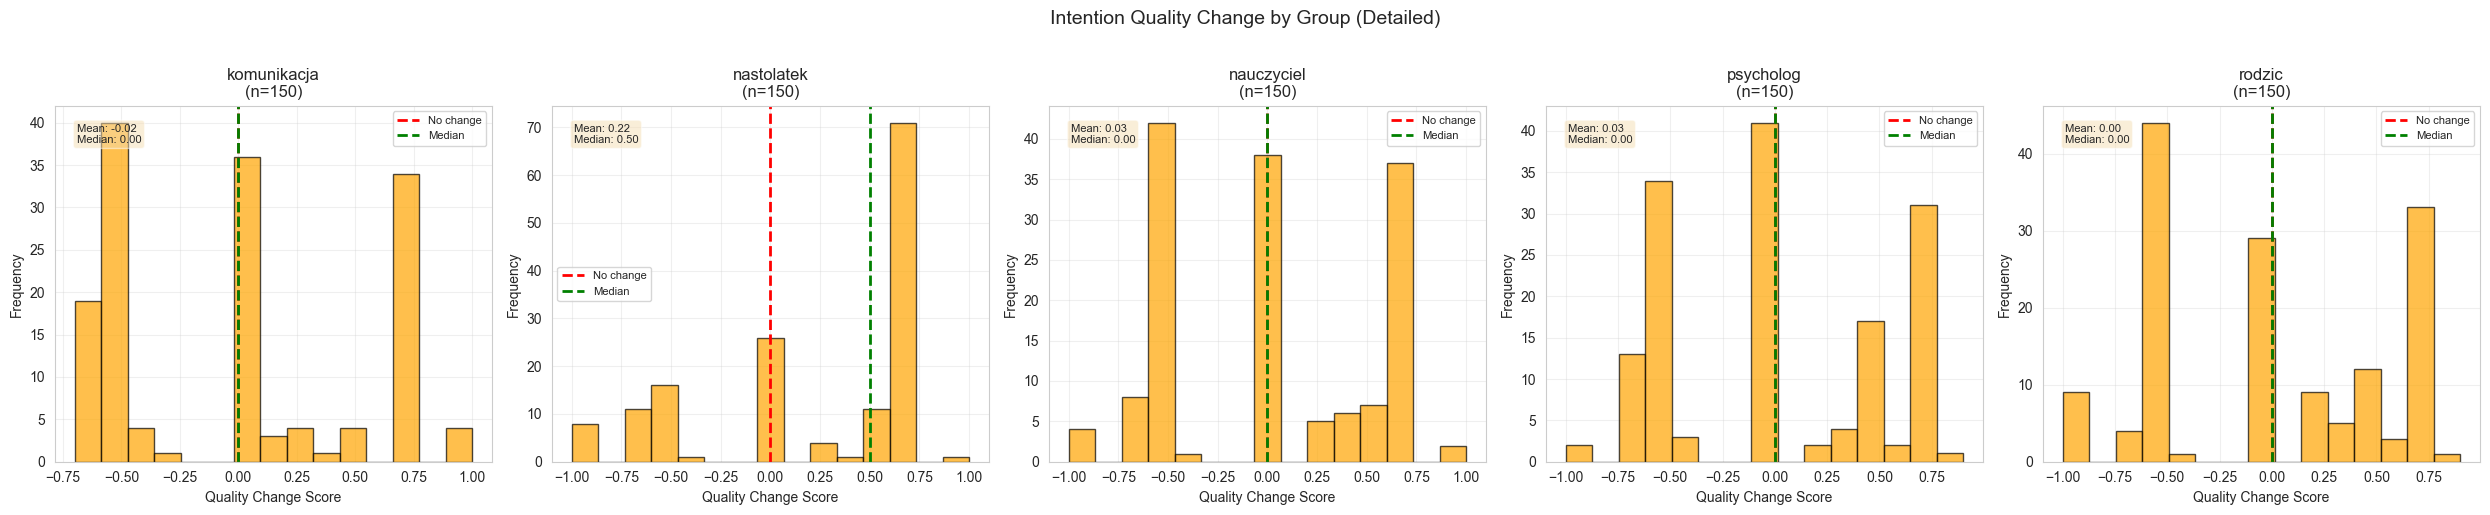

In [22]:
# Detailed per-group analysis for Intention Quality Change
groups = sorted(df['annotator_group'].unique())
n_groups = len(groups)
fig, axes = plt.subplots(1, n_groups, figsize=(5*n_groups, 5))

if n_groups == 1:
    axes = [axes]

for idx, group in enumerate(groups):
    group_data = df[df['annotator_group'] == group]['intention_evolution_assessment_quality_change']
    
    axes[idx].hist(group_data, bins=15, edgecolor='black', alpha=0.7, color='orange')
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
    axes[idx].axvline(group_data.median(), color='green', linestyle='--', linewidth=2, label='Median')
    axes[idx].set_xlabel('Quality Change Score')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{group}\n(n={len(group_data)})')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)
    
    # Add stats text
    stats_text = f'Mean: {group_data.mean():.2f}\nMedian: {group_data.median():.2f}'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=8)

plt.suptitle('Intention Quality Change by Group (Detailed)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 4. Comparison: Reaction vs Intention Changes

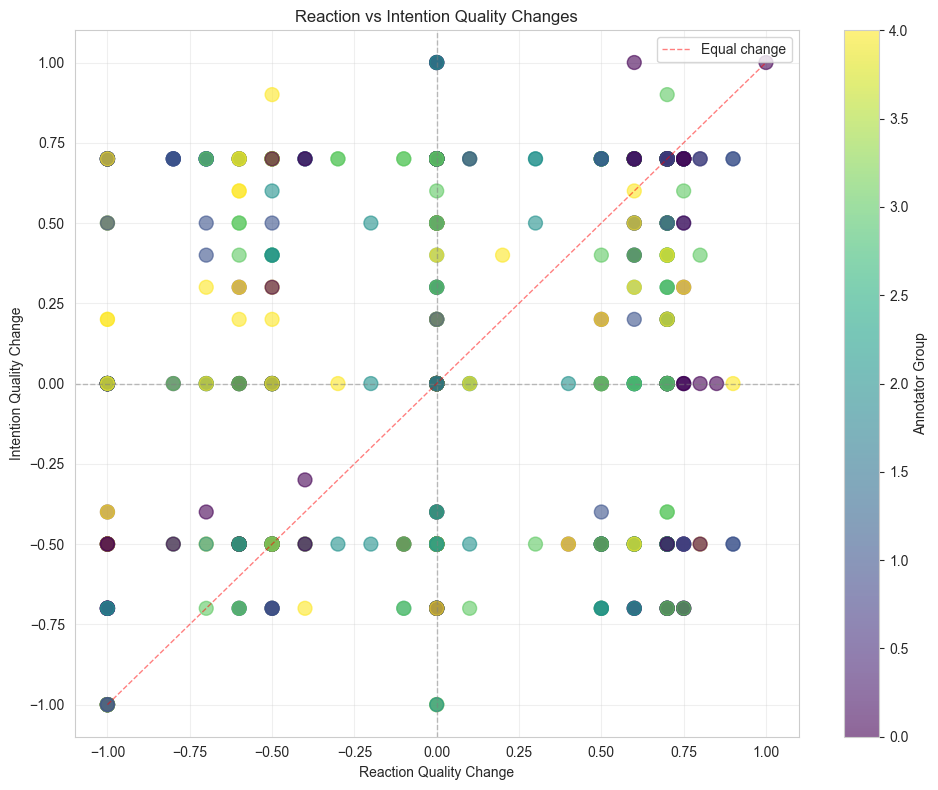

Correlation between Reaction and Intention quality changes: 0.204

Paired t-test: t=-0.811, p=0.4174
Mean difference: -0.021


In [23]:
# Scatter plot: Reaction vs Intention quality changes
fig, ax = plt.subplots(figsize=(10, 8))

scatter = ax.scatter(
    df['reaction_evolution_assessment_quality_change'],
    df['intention_evolution_assessment_quality_change'],
    c=df['annotator_group'].astype('category').cat.codes,
    cmap='viridis',
    alpha=0.6,
    s=100
)

# Add reference lines
ax.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax.plot([-1, 1], [-1, 1], 'r--', linewidth=1, alpha=0.5, label='Equal change')

ax.set_xlabel('Reaction Quality Change')
ax.set_ylabel('Intention Quality Change')
ax.set_title('Reaction vs Intention Quality Changes')
ax.grid(alpha=0.3)
ax.legend()

# Add colorbar for groups
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Annotator Group')

plt.tight_layout()
plt.show()

# Correlation
correlation = df[['reaction_evolution_assessment_quality_change', 
                  'intention_evolution_assessment_quality_change']].corr().iloc[0, 1]
print(f"Correlation between Reaction and Intention quality changes: {correlation:.3f}")

# Test for significant difference
t_stat, p_value = stats.ttest_rel(
    df['reaction_evolution_assessment_quality_change'].dropna(),
    df['intention_evolution_assessment_quality_change'].dropna()
)
print(f"\nPaired t-test: t={t_stat:.3f}, p={p_value:.4f}")
print(f"Mean difference: {df['reaction_evolution_assessment_quality_change'].mean() - df['intention_evolution_assessment_quality_change'].mean():.3f}")

## 5. Depth Analysis - Before vs After

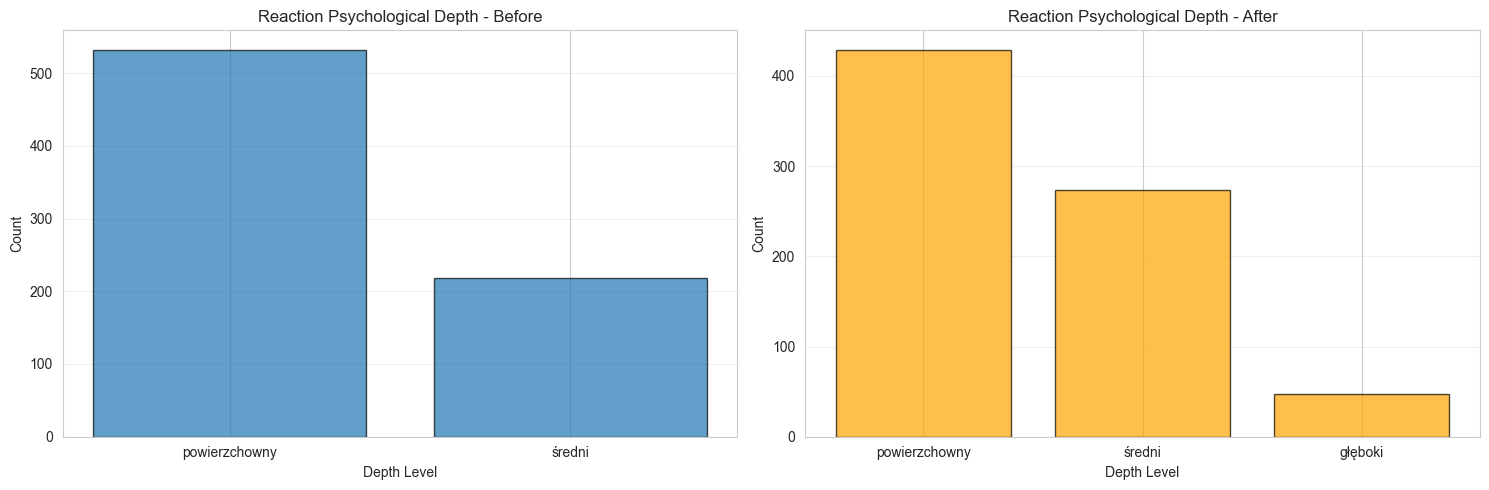

Reaction Depth Analysis:

Before:
reaction_psychological_depth_analysis_before_level
powierzchowny    0.709333
średni           0.290667
Name: proportion, dtype: float64

After:
reaction_psychological_depth_analysis_after_level
powierzchowny    0.572000
średni           0.365333
głęboki          0.062667
Name: proportion, dtype: float64


In [24]:
# Reaction depth changes - Overall
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before
before_counts = df['reaction_psychological_depth_analysis_before_level'].value_counts()
axes[0].bar(before_counts.index, before_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Depth Level')
axes[0].set_ylabel('Count')
axes[0].set_title('Reaction Psychological Depth - Before')
axes[0].grid(alpha=0.3, axis='y')

# After
after_counts = df['reaction_psychological_depth_analysis_after_level'].value_counts()
axes[1].bar(after_counts.index, after_counts.values, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Depth Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Reaction Psychological Depth - After')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Reaction Depth Analysis:")
print("\nBefore:")
print(df['reaction_psychological_depth_analysis_before_level'].value_counts(normalize=True))
print("\nAfter:")
print(df['reaction_psychological_depth_analysis_after_level'].value_counts(normalize=True))

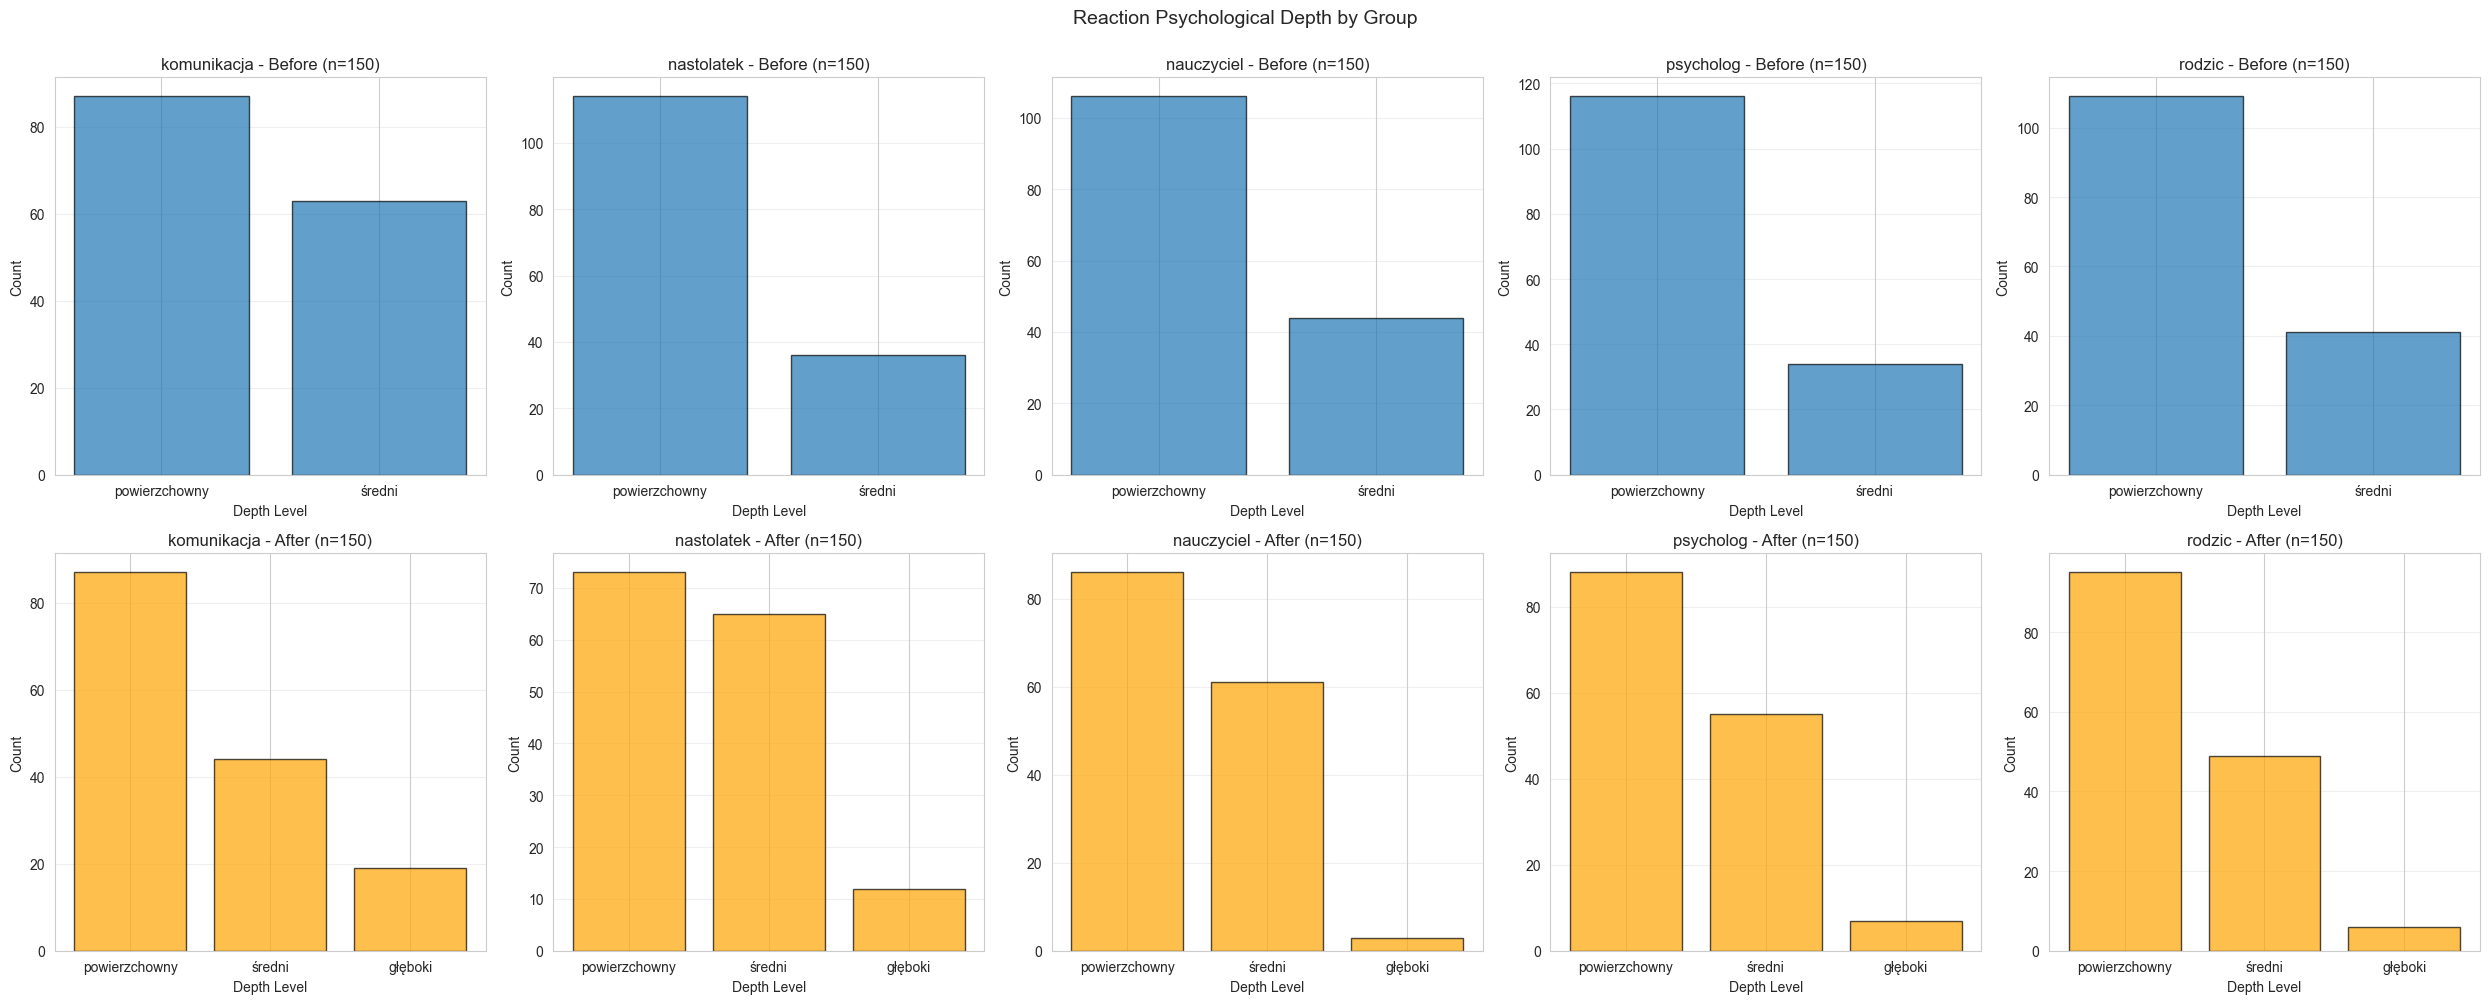

In [25]:
# Reaction depth changes - By Group (Detailed)
groups = sorted(df['annotator_group'].unique())
n_groups = len(groups)
fig, axes = plt.subplots(2, n_groups, figsize=(5*n_groups, 10))

if n_groups == 1:
    axes = axes.reshape(2, 1)

for idx, group in enumerate(groups):
    group_data = df[df['annotator_group'] == group]
    
    # Before
    before_counts = group_data['reaction_psychological_depth_analysis_before_level'].value_counts()
    axes[0, idx].bar(before_counts.index, before_counts.values, edgecolor='black', alpha=0.7)
    axes[0, idx].set_xlabel('Depth Level')
    axes[0, idx].set_ylabel('Count')
    axes[0, idx].set_title(f'{group} - Before (n={len(group_data)})')
    axes[0, idx].grid(alpha=0.3, axis='y')
    
    # After
    after_counts = group_data['reaction_psychological_depth_analysis_after_level'].value_counts()
    axes[1, idx].bar(after_counts.index, after_counts.values, edgecolor='black', alpha=0.7, color='orange')
    axes[1, idx].set_xlabel('Depth Level')
    axes[1, idx].set_ylabel('Count')
    axes[1, idx].set_title(f'{group} - After (n={len(group_data)})')
    axes[1, idx].grid(alpha=0.3, axis='y')

plt.suptitle('Reaction Psychological Depth by Group', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

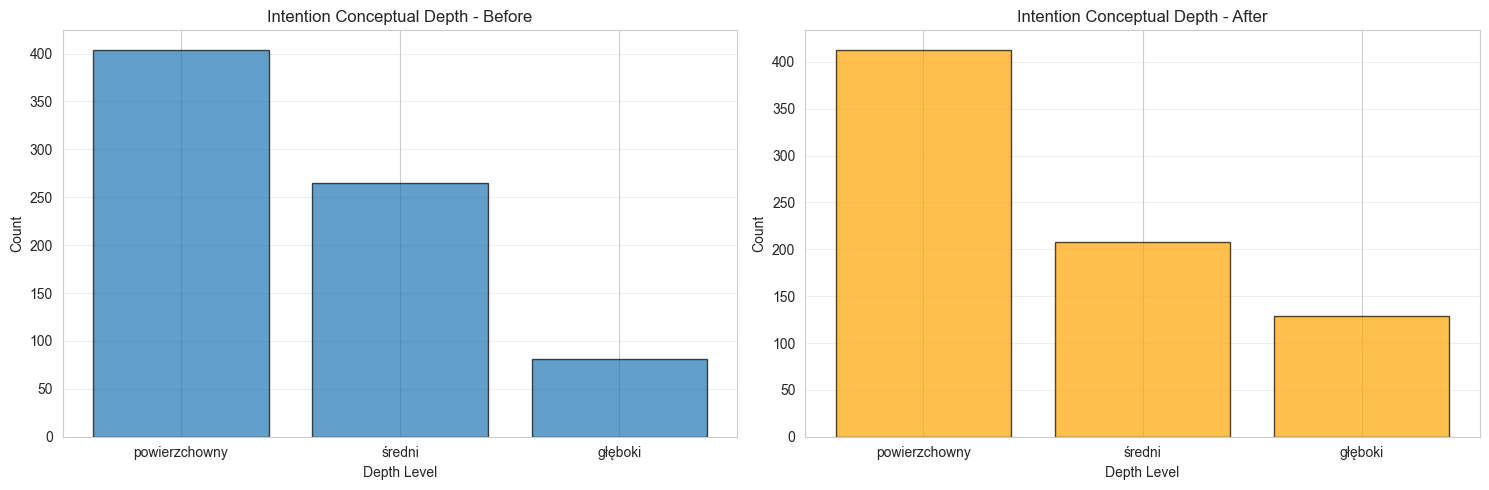

Intention Depth Analysis:

Before:
intention_conceptual_depth_analysis_before_level
powierzchowny    0.538667
średni           0.353333
głęboki          0.108000
Name: proportion, dtype: float64

After:
intention_conceptual_depth_analysis_after_level
powierzchowny    0.550667
średni           0.277333
głęboki          0.172000
Name: proportion, dtype: float64


In [26]:
# Intention depth changes - Overall
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Before
before_counts = df['intention_conceptual_depth_analysis_before_level'].value_counts()
axes[0].bar(before_counts.index, before_counts.values, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Depth Level')
axes[0].set_ylabel('Count')
axes[0].set_title('Intention Conceptual Depth - Before')
axes[0].grid(alpha=0.3, axis='y')

# After
after_counts = df['intention_conceptual_depth_analysis_after_level'].value_counts()
axes[1].bar(after_counts.index, after_counts.values, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Depth Level')
axes[1].set_ylabel('Count')
axes[1].set_title('Intention Conceptual Depth - After')
axes[1].grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Intention Depth Analysis:")
print("\nBefore:")
print(df['intention_conceptual_depth_analysis_before_level'].value_counts(normalize=True))
print("\nAfter:")
print(df['intention_conceptual_depth_analysis_after_level'].value_counts(normalize=True))

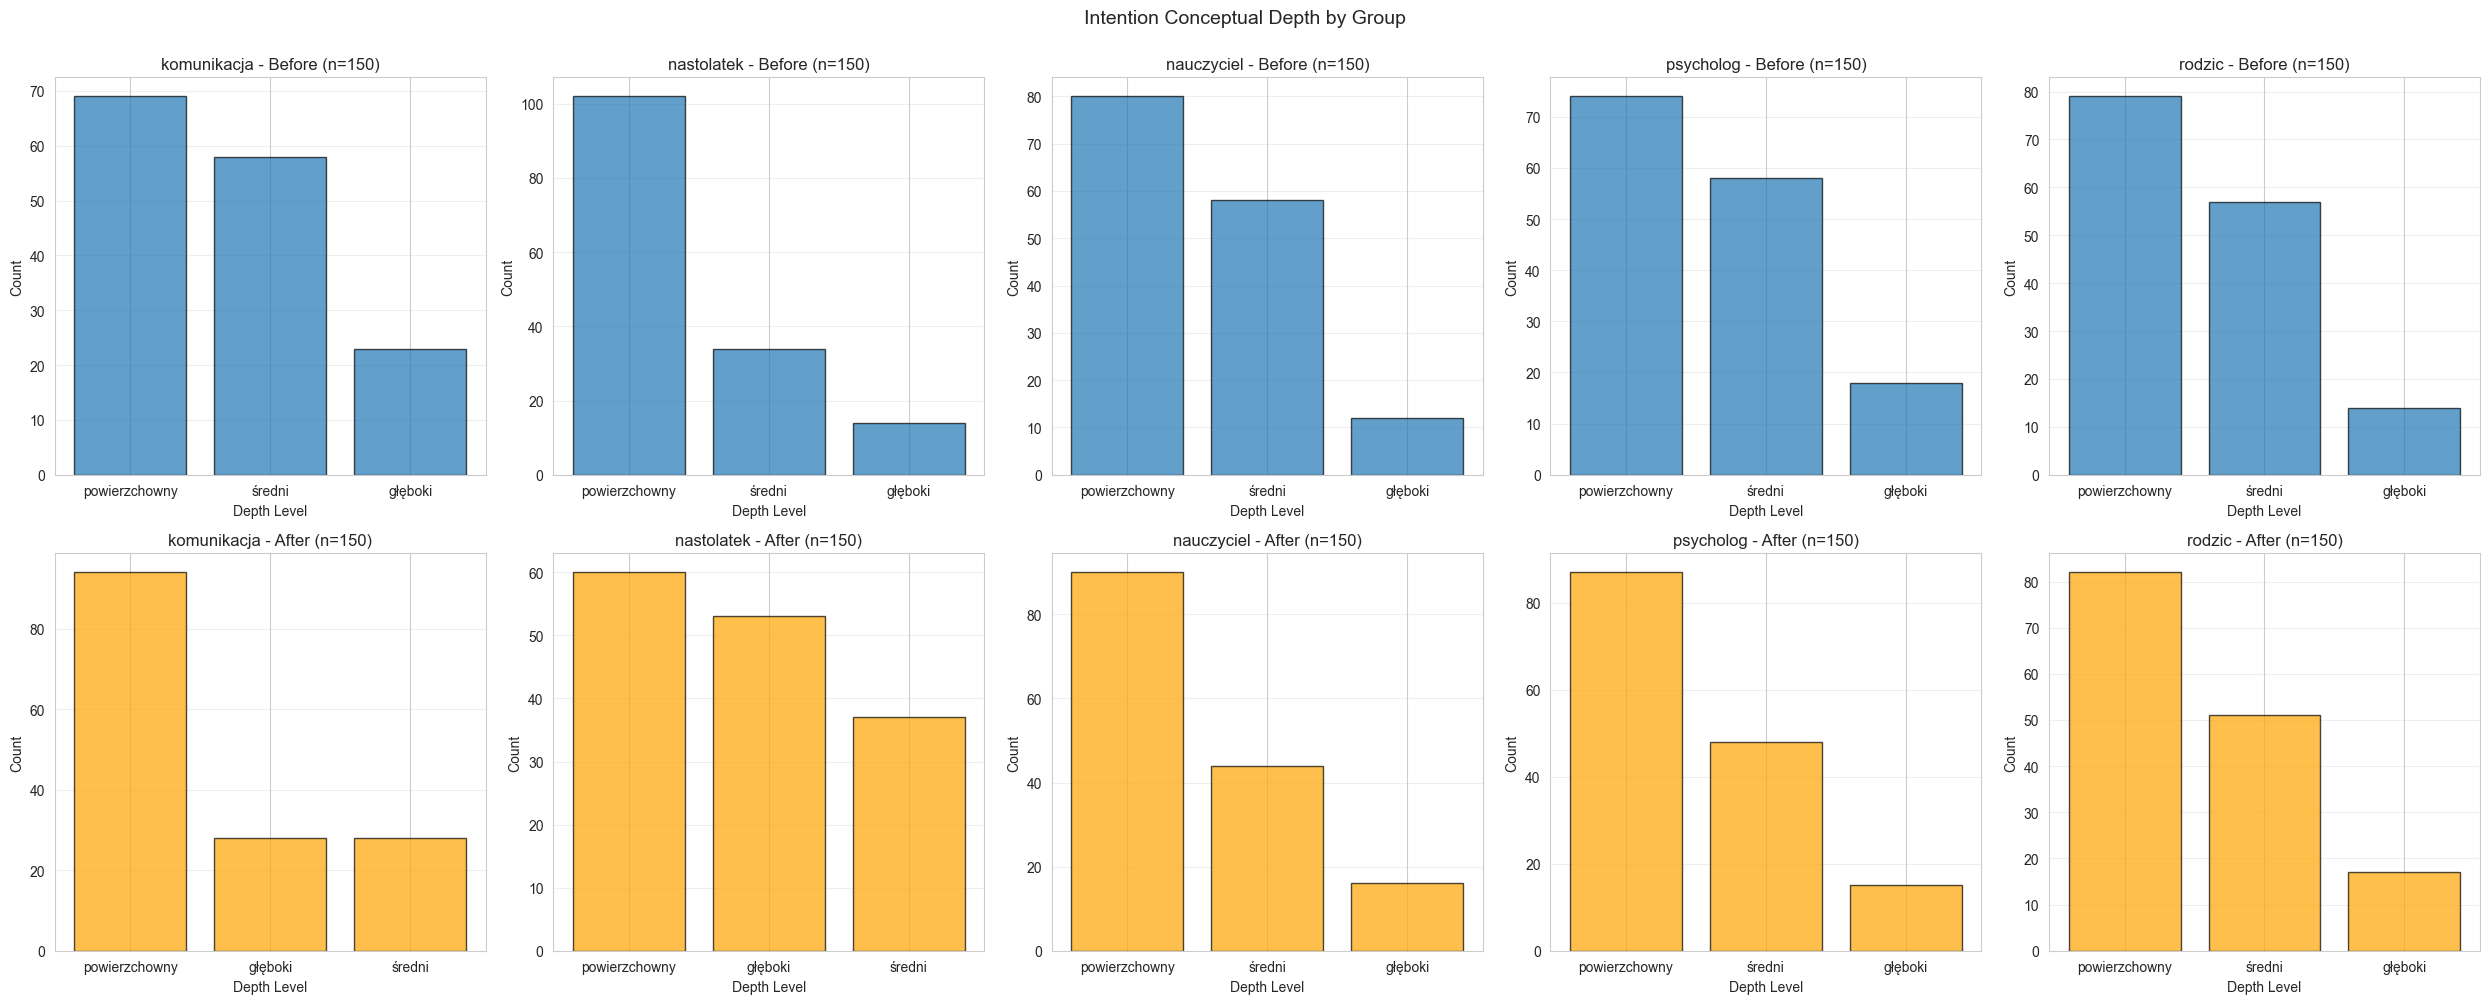

In [27]:
# Intention depth changes - By Group (Detailed)
groups = sorted(df['annotator_group'].unique())
n_groups = len(groups)
fig, axes = plt.subplots(2, n_groups, figsize=(5*n_groups, 10))

if n_groups == 1:
    axes = axes.reshape(2, 1)

for idx, group in enumerate(groups):
    group_data = df[df['annotator_group'] == group]
    
    # Before
    before_counts = group_data['intention_conceptual_depth_analysis_before_level'].value_counts()
    axes[0, idx].bar(before_counts.index, before_counts.values, edgecolor='black', alpha=0.7)
    axes[0, idx].set_xlabel('Depth Level')
    axes[0, idx].set_ylabel('Count')
    axes[0, idx].set_title(f'{group} - Before (n={len(group_data)})')
    axes[0, idx].grid(alpha=0.3, axis='y')
    
    # After
    after_counts = group_data['intention_conceptual_depth_analysis_after_level'].value_counts()
    axes[1, idx].bar(after_counts.index, after_counts.values, edgecolor='black', alpha=0.7, color='orange')
    axes[1, idx].set_xlabel('Depth Level')
    axes[1, idx].set_ylabel('Count')
    axes[1, idx].set_title(f'{group} - After (n={len(group_data)})')
    axes[1, idx].grid(alpha=0.3, axis='y')

plt.suptitle('Intention Conceptual Depth by Group', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

## 6. Certainty Analysis

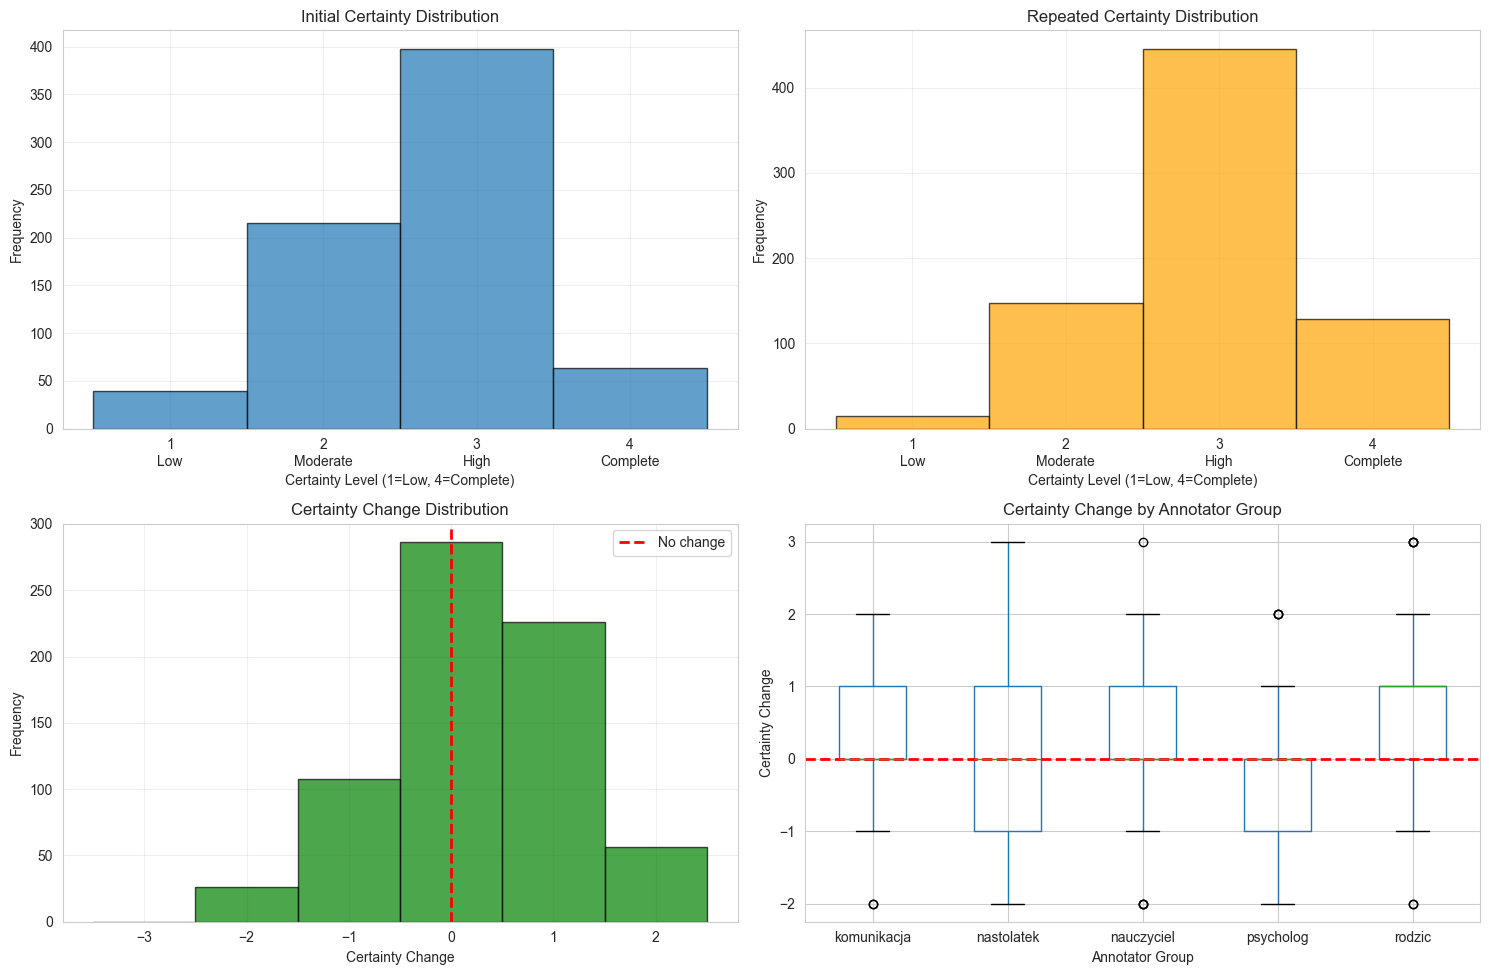

Certainty Statistics:
Initial certainty: 2.68 ± 0.71
Repeated certainty: 2.93 ± 0.67
Mean certainty change: 0.26

Certainty change rates:
  Increased: 282 (37.6%)
  Decreased: 134 (17.9%)
  No change: 286 (38.1%)

Paired t-test: t=-7.233, p=0.0000
  Result: Significant change in certainty (p < 0.05)


In [39]:
# Certainty changes - Overview

# Ensure certainty values are numeric and certainty_change column exists
if df['first_question_10_certainty'].dtype == 'object':
    certainty_mapping = {
        'Niska pewność': 1,
        'Umiarkowana pewność': 2,
        'Wysoka pewność': 3,
        'Całkowita pewność': 4
    }
    df['first_question_10_certainty'] = df['first_question_10_certainty'].map(certainty_mapping)
    df['repeated_question_10_certainty'] = df['repeated_question_10_certainty'].map(certainty_mapping)

if 'certainty_change' not in df.columns:
    df['certainty_change'] = df['repeated_question_10_certainty'] - df['first_question_10_certainty']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# First certainty distribution
axes[0, 0].hist(df['first_question_10_certainty'].dropna(), bins=range(1, 6), edgecolor='black', alpha=0.7, align='left')
axes[0, 0].set_xlabel('Certainty Level (1=Low, 4=Complete)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Initial Certainty Distribution')
axes[0, 0].set_xticks([1, 2, 3, 4])
axes[0, 0].set_xticklabels(['1\nLow', '2\nModerate', '3\nHigh', '4\nComplete'])
axes[0, 0].grid(alpha=0.3)

# Repeated certainty distribution
axes[0, 1].hist(df['repeated_question_10_certainty'].dropna(), bins=range(1, 6), edgecolor='black', alpha=0.7, color='orange', align='left')
axes[0, 1].set_xlabel('Certainty Level (1=Low, 4=Complete)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Repeated Certainty Distribution')
axes[0, 1].set_xticks([1, 2, 3, 4])
axes[0, 1].set_xticklabels(['1\nLow', '2\nModerate', '3\nHigh', '4\nComplete'])
axes[0, 1].grid(alpha=0.3)

# Certainty change
axes[1, 0].hist(df['certainty_change'].dropna(), bins=range(-3, 4), edgecolor='black', alpha=0.7, color='green', align='left')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
axes[1, 0].set_xlabel('Certainty Change')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Certainty Change Distribution')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Certainty change by group
df.boxplot(column='certainty_change', by='annotator_group', ax=axes[1, 1])
axes[1, 1].set_xlabel('Annotator Group')
axes[1, 1].set_ylabel('Certainty Change')
axes[1, 1].set_title('Certainty Change by Annotator Group')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=2)
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

print("Certainty Statistics:")
print(f"Initial certainty: {df['first_question_10_certainty'].mean():.2f} ± {df['first_question_10_certainty'].std():.2f}")
print(f"Repeated certainty: {df['repeated_question_10_certainty'].mean():.2f} ± {df['repeated_question_10_certainty'].std():.2f}")
print(f"Mean certainty change: {df['certainty_change'].mean():.2f}")
print(f"\nCertainty change rates:")
print(f"  Increased: {(df['certainty_change'] > 0).sum()} ({(df['certainty_change'] > 0).mean():.1%})")
print(f"  Decreased: {(df['certainty_change'] < 0).sum()} ({(df['certainty_change'] < 0).mean():.1%})")
print(f"  No change: {(df['certainty_change'] == 0).sum()} ({(df['certainty_change'] == 0).mean():.1%})")

# Test for significant change
valid_pairs = df[['first_question_10_certainty', 'repeated_question_10_certainty']].dropna()
if len(valid_pairs) > 0:
    t_stat, p_value = stats.ttest_rel(valid_pairs['first_question_10_certainty'], 
                                      valid_pairs['repeated_question_10_certainty'])
    print(f"\nPaired t-test: t={t_stat:.3f}, p={p_value:.4f}")
    if p_value < 0.05:
        print("  Result: Significant change in certainty (p < 0.05)")
    else:
        print("  Result: No significant change in certainty (p >= 0.05)")

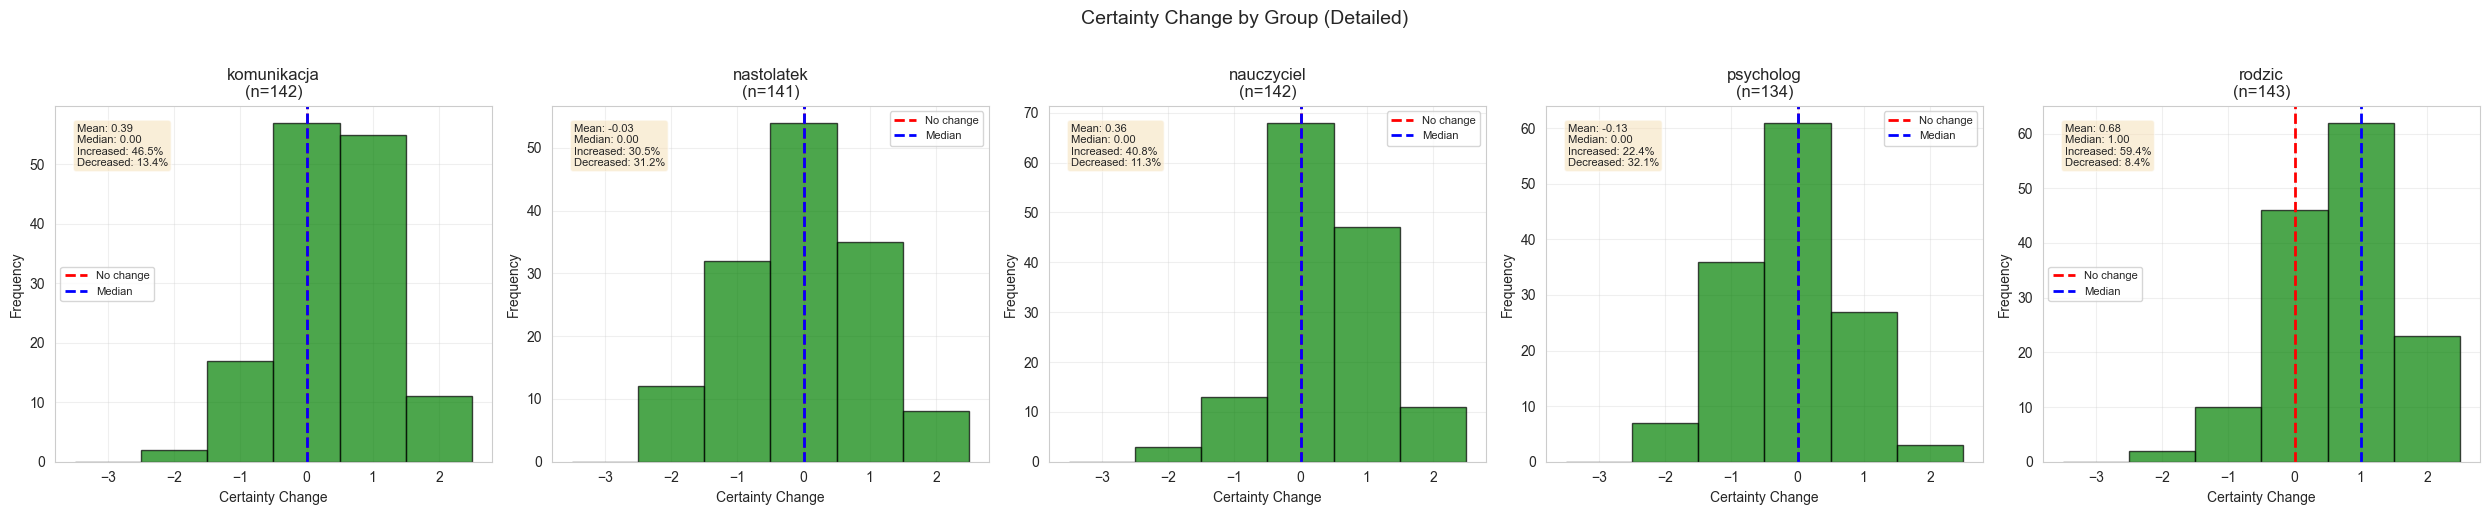


Certainty Change Statistics by Group:
--------------------------------------------------------------------------------

komunikacja:
  Mean: 0.394
  Median: 0.0
  Std: 0.850
  Increased: 66 (46.5%)
  Decreased: 19 (13.4%)
  No change: 57 (40.1%)

nastolatek:
  Mean: -0.028
  Median: 0.0
  Std: 1.042
  Increased: 43 (30.5%)
  Decreased: 44 (31.2%)
  No change: 54 (38.3%)

nauczyciel:
  Mean: 0.359
  Median: 0.0
  Std: 0.853
  Increased: 58 (40.8%)
  Decreased: 16 (11.3%)
  No change: 68 (47.9%)

psycholog:
  Mean: -0.127
  Median: 0.0
  Std: 0.871
  Increased: 30 (22.4%)
  Decreased: 43 (32.1%)
  No change: 61 (45.5%)

rodzic:
  Mean: 0.678
  Median: 1.0
  Std: 0.924
  Increased: 85 (59.4%)
  Decreased: 12 (8.4%)
  No change: 46 (32.2%)


In [40]:
# Certainty change - Detailed by Group

# Ensure certainty values are numeric and certainty_change column exists
if df['first_question_10_certainty'].dtype == 'object':
    certainty_mapping = {
        'Niska pewność': 1,
        'Umiarkowana pewność': 2,
        'Wysoka pewność': 3,
        'Całkowita pewność': 4
    }
    df['first_question_10_certainty'] = df['first_question_10_certainty'].map(certainty_mapping)
    df['repeated_question_10_certainty'] = df['repeated_question_10_certainty'].map(certainty_mapping)

if 'certainty_change' not in df.columns:
    df['certainty_change'] = df['repeated_question_10_certainty'] - df['first_question_10_certainty']

groups = sorted(df['annotator_group'].unique())
n_groups = len(groups)
fig, axes = plt.subplots(1, n_groups, figsize=(5*n_groups, 5))

if n_groups == 1:
    axes = [axes]

for idx, group in enumerate(groups):
    group_data = df[df['annotator_group'] == group]['certainty_change'].dropna()
    
    axes[idx].hist(group_data, bins=range(-3, 4), edgecolor='black', alpha=0.7, color='green', align='left')
    axes[idx].axvline(0, color='red', linestyle='--', linewidth=2, label='No change')
    axes[idx].axvline(group_data.median(), color='blue', linestyle='--', linewidth=2, label='Median')
    axes[idx].set_xlabel('Certainty Change')
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{group}\n(n={len(group_data)})')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(alpha=0.3)
    
    # Add stats text
    stats_text = f'Mean: {group_data.mean():.2f}\nMedian: {group_data.median():.2f}\nIncreased: {(group_data > 0).mean():.1%}\nDecreased: {(group_data < 0).mean():.1%}'
    axes[idx].text(0.05, 0.95, stats_text, transform=axes[idx].transAxes,
                   verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                   fontsize=8)

plt.suptitle('Certainty Change by Group (Detailed)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Group comparison statistics
print("\nCertainty Change Statistics by Group:")
print("-" * 80)
for group in groups:
    group_data = df[df['annotator_group'] == group]['certainty_change'].dropna()
    print(f"\n{group}:")
    print(f"  Mean: {group_data.mean():.3f}")
    print(f"  Median: {group_data.median():.1f}")
    print(f"  Std: {group_data.std():.3f}")
    print(f"  Increased: {(group_data > 0).sum()} ({(group_data > 0).mean():.1%})")
    print(f"  Decreased: {(group_data < 0).sum()} ({(group_data < 0).mean():.1%})")
    print(f"  No change: {(group_data == 0).sum()} ({(group_data == 0).mean():.1%})")

## 7. Correlation: Certainty vs Quality Changes

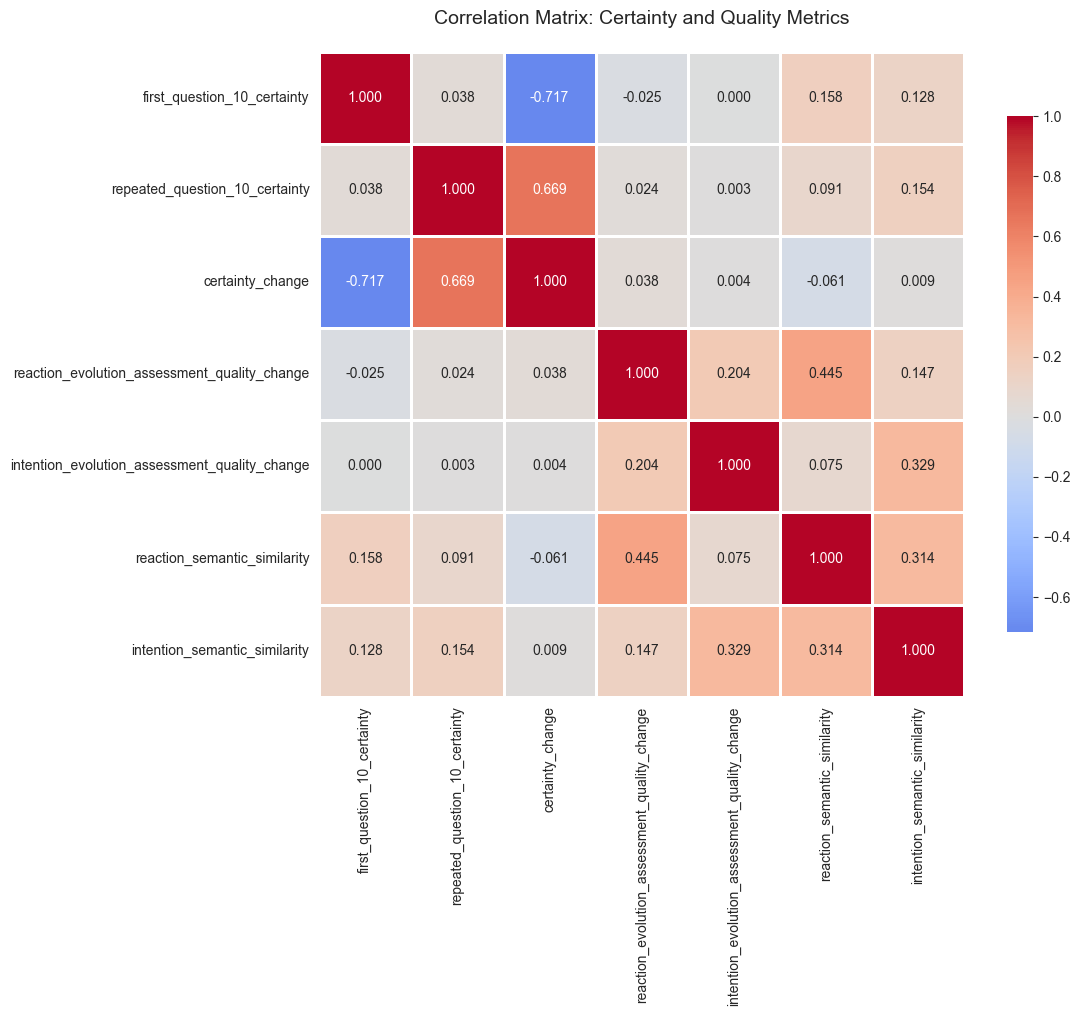

Key Correlations:

Certainty change vs Reaction quality change: 0.038
Certainty change vs Intention quality change: 0.004

Initial certainty vs Reaction quality change: -0.025
Initial certainty vs Intention quality change: 0.000


In [41]:
# Correlation matrix
correlation_cols = [
    'first_question_10_certainty',
    'repeated_question_10_certainty',
    'certainty_change',
    'reaction_evolution_assessment_quality_change',
    'intention_evolution_assessment_quality_change',
    'reaction_semantic_similarity',
    'intention_semantic_similarity'
]

corr_matrix = df[correlation_cols].corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: Certainty and Quality Metrics', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Key correlations
print("Key Correlations:")
print(f"\nCertainty change vs Reaction quality change: {df[['certainty_change', 'reaction_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}")
print(f"Certainty change vs Intention quality change: {df[['certainty_change', 'intention_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}")
print(f"\nInitial certainty vs Reaction quality change: {df[['first_question_10_certainty', 'reaction_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}")
print(f"Initial certainty vs Intention quality change: {df[['first_question_10_certainty', 'intention_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}")

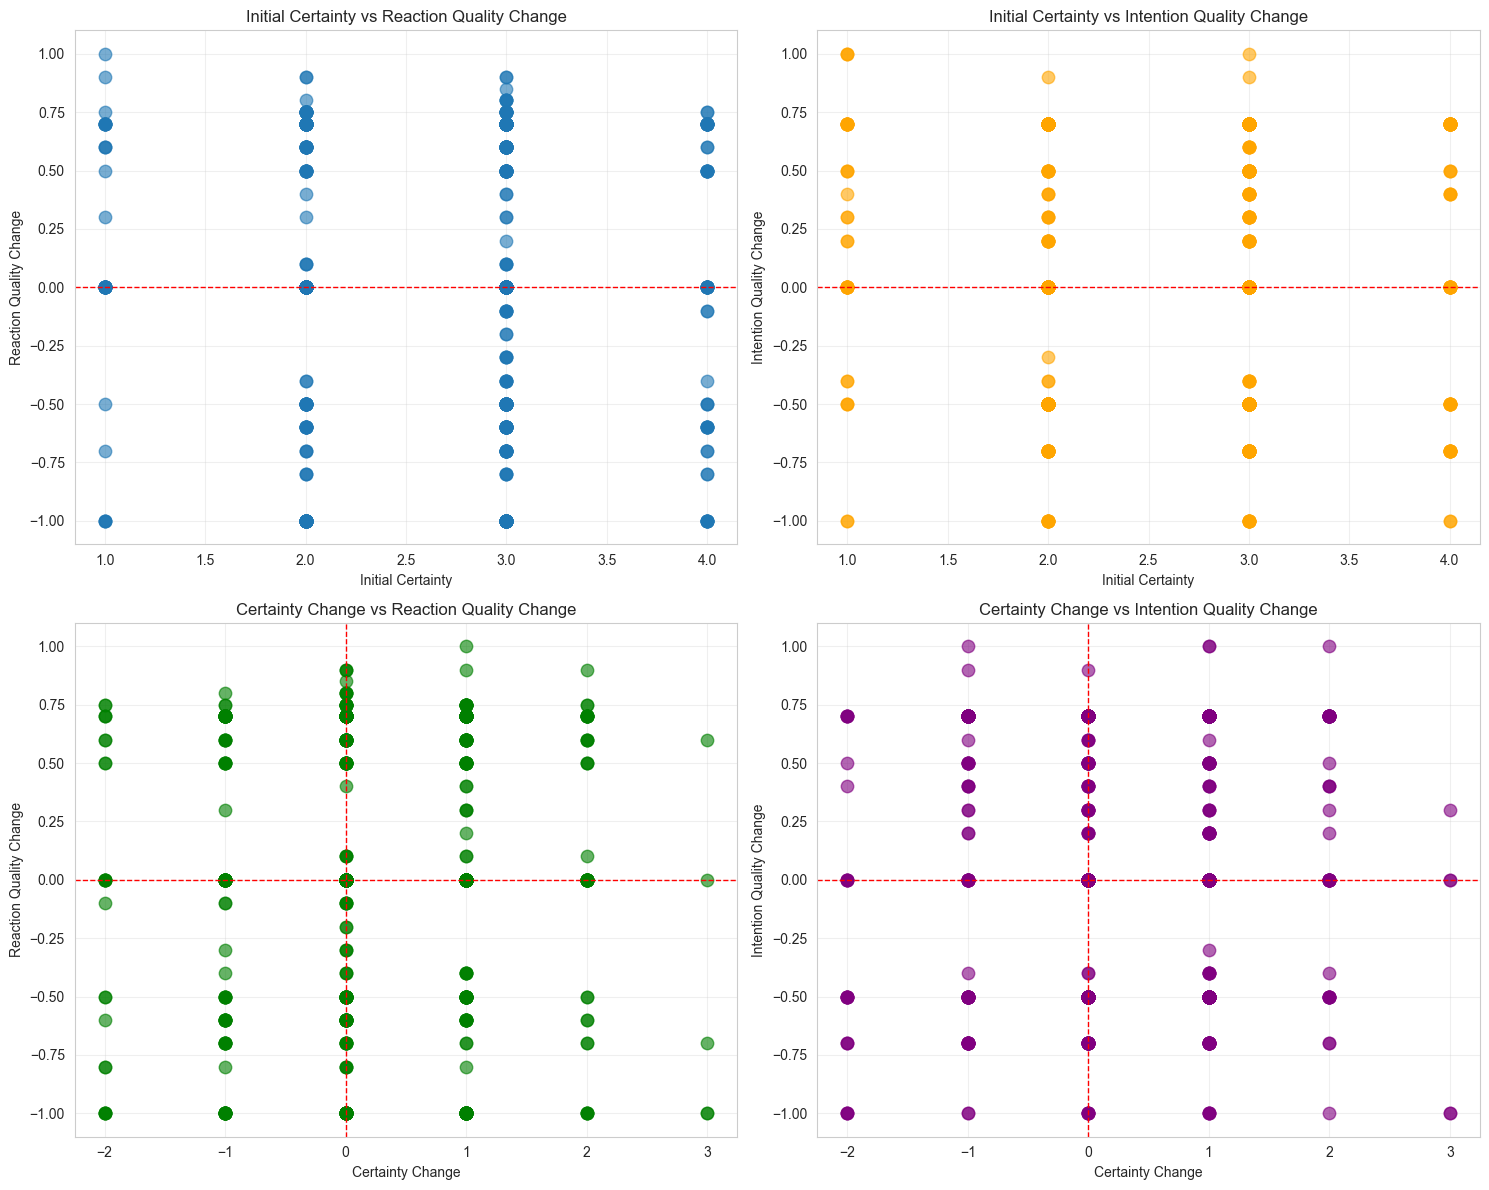

In [42]:
# Scatter plots: Certainty vs Quality changes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Initial certainty vs Reaction quality change
axes[0, 0].scatter(df['first_question_10_certainty'], 
                   df['reaction_evolution_assessment_quality_change'],
                   alpha=0.6, s=80)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 0].set_xlabel('Initial Certainty')
axes[0, 0].set_ylabel('Reaction Quality Change')
axes[0, 0].set_title('Initial Certainty vs Reaction Quality Change')
axes[0, 0].grid(alpha=0.3)

# Initial certainty vs Intention quality change
axes[0, 1].scatter(df['first_question_10_certainty'], 
                   df['intention_evolution_assessment_quality_change'],
                   alpha=0.6, s=80, color='orange')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Initial Certainty')
axes[0, 1].set_ylabel('Intention Quality Change')
axes[0, 1].set_title('Initial Certainty vs Intention Quality Change')
axes[0, 1].grid(alpha=0.3)

# Certainty change vs Reaction quality change
axes[1, 0].scatter(df['certainty_change'], 
                   df['reaction_evolution_assessment_quality_change'],
                   alpha=0.6, s=80, color='green')
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_xlabel('Certainty Change')
axes[1, 0].set_ylabel('Reaction Quality Change')
axes[1, 0].set_title('Certainty Change vs Reaction Quality Change')
axes[1, 0].grid(alpha=0.3)

# Certainty change vs Intention quality change
axes[1, 1].scatter(df['certainty_change'], 
                   df['intention_evolution_assessment_quality_change'],
                   alpha=0.6, s=80, color='purple')
axes[1, 1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_xlabel('Certainty Change')
axes[1, 1].set_ylabel('Intention Quality Change')
axes[1, 1].set_title('Certainty Change vs Intention Quality Change')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Annotator Group Comparison

Statistics by Annotator Group:
                reaction_evolution_assessment_quality_change                \
                                                        mean    std median   
annotator_group                                                              
komunikacja                                            0.018  0.640    0.0   
nastolatek                                             0.011  0.699    0.0   
nauczyciel                                             0.052  0.518    0.0   
psycholog                                              0.117  0.456    0.0   
rodzic                                                -0.046  0.586    0.0   

                intention_evolution_assessment_quality_change                \
                                                         mean    std median   
annotator_group                                                               
komunikacja                                            -0.021  0.533    0.0   
nastolatek                  

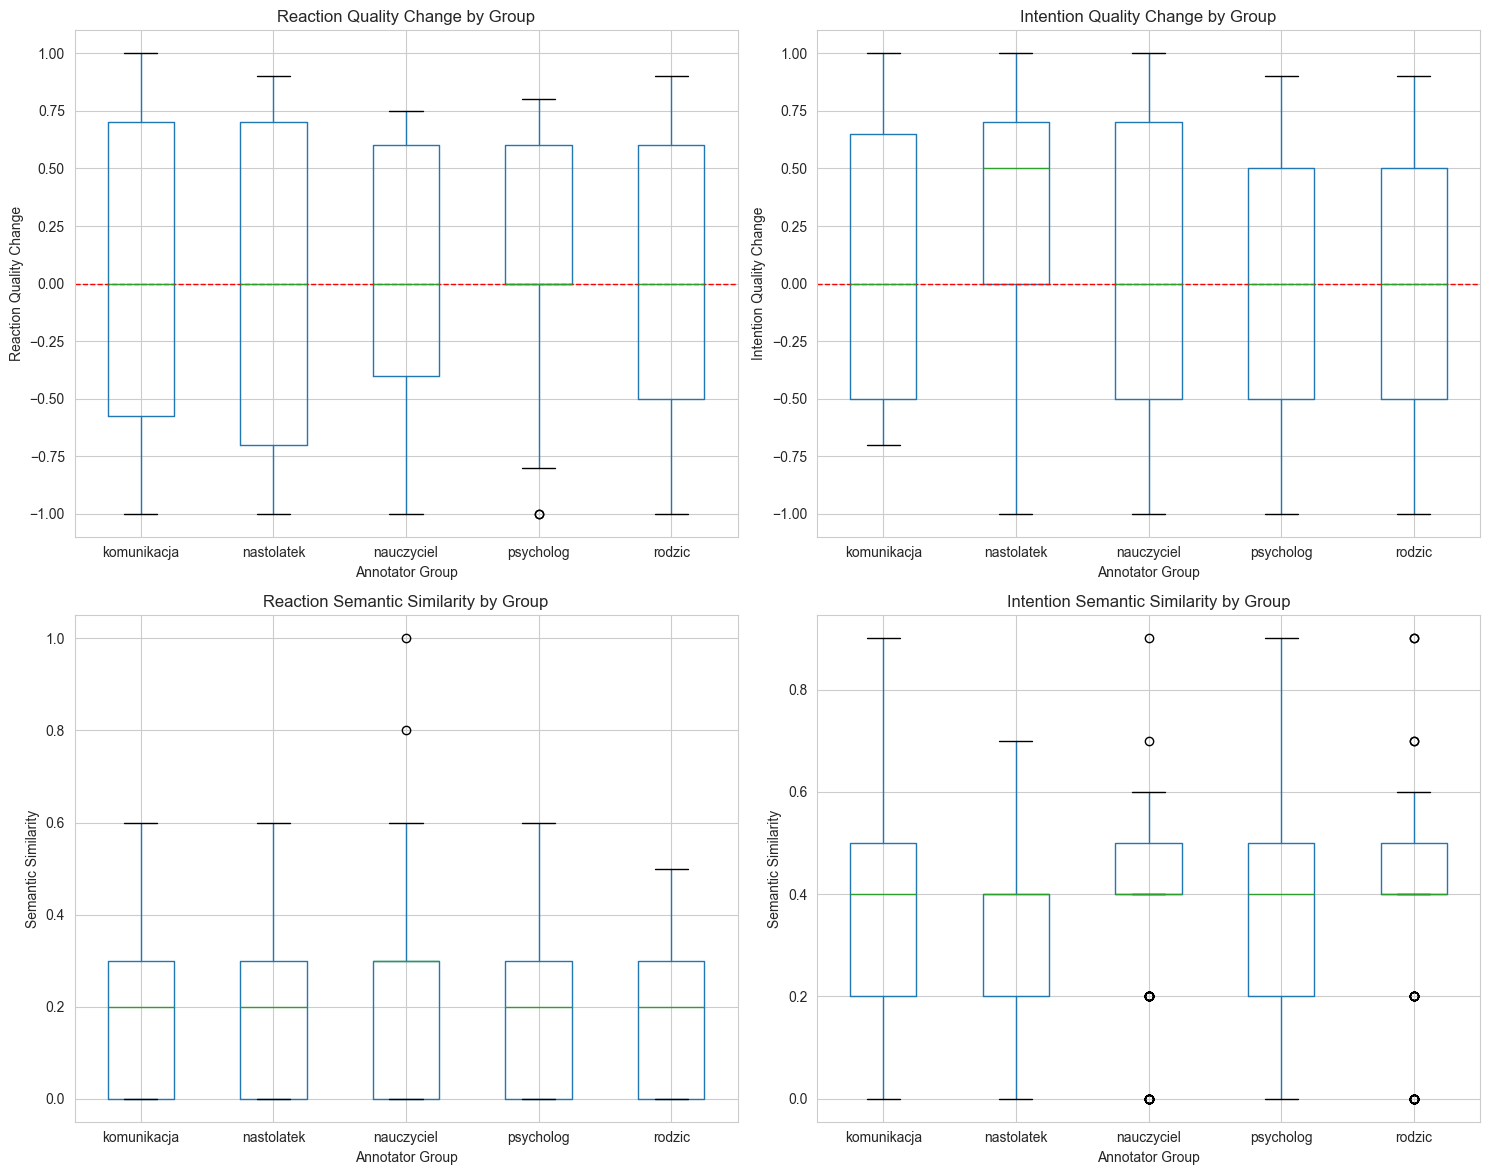

In [43]:
# Compare groups
group_stats = df.groupby('annotator_group').agg({
    'reaction_evolution_assessment_quality_change': ['mean', 'std', 'median'],
    'intention_evolution_assessment_quality_change': ['mean', 'std', 'median'],
    'certainty_change': ['mean', 'std', 'median'],
    'reaction_semantic_similarity': ['mean', 'std'],
    'intention_semantic_similarity': ['mean', 'std']
}).round(3)

print("Statistics by Annotator Group:")
print(group_stats)

# Visualize group comparisons
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Reaction quality change by group
df.boxplot(column='reaction_evolution_assessment_quality_change', by='annotator_group', ax=axes[0, 0])
axes[0, 0].set_xlabel('Annotator Group')
axes[0, 0].set_ylabel('Reaction Quality Change')
axes[0, 0].set_title('Reaction Quality Change by Group')
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1)

# Intention quality change by group
df.boxplot(column='intention_evolution_assessment_quality_change', by='annotator_group', ax=axes[0, 1])
axes[0, 1].set_xlabel('Annotator Group')
axes[0, 1].set_ylabel('Intention Quality Change')
axes[0, 1].set_title('Intention Quality Change by Group')
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)

# Reaction semantic similarity by group
df.boxplot(column='reaction_semantic_similarity', by='annotator_group', ax=axes[1, 0])
axes[1, 0].set_xlabel('Annotator Group')
axes[1, 0].set_ylabel('Semantic Similarity')
axes[1, 0].set_title('Reaction Semantic Similarity by Group')

# Intention semantic similarity by group
df.boxplot(column='intention_semantic_similarity', by='annotator_group', ax=axes[1, 1])
axes[1, 1].set_xlabel('Annotator Group')
axes[1, 1].set_ylabel('Semantic Similarity')
axes[1, 1].set_title('Intention Semantic Similarity by Group')

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

## 9. Summary Statistics

In [44]:
# Overall summary
summary = {
    'Metric': [
        'Reaction Quality Change (mean)',
        'Intention Quality Change (mean)',
        'Certainty Change (mean)',
        'Reaction Improvement Rate',
        'Intention Improvement Rate',
        'Reaction Semantic Similarity (mean)',
        'Intention Semantic Similarity (mean)',
        'Correlation: Reaction-Intention Quality',
        'Correlation: Certainty-Reaction Quality',
        'Correlation: Certainty-Intention Quality'
    ],
    'Value': [
        f"{df['reaction_evolution_assessment_quality_change'].mean():.3f}",
        f"{df['intention_evolution_assessment_quality_change'].mean():.3f}",
        f"{df['certainty_change'].mean():.3f}",
        f"{(df['reaction_evolution_assessment_quality_change'] > 0).mean():.1%}",
        f"{(df['intention_evolution_assessment_quality_change'] > 0).mean():.1%}",
        f"{df['reaction_semantic_similarity'].mean():.3f}",
        f"{df['intention_semantic_similarity'].mean():.3f}",
        f"{df[['reaction_evolution_assessment_quality_change', 'intention_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}",
        f"{df[['certainty_change', 'reaction_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}",
        f"{df[['certainty_change', 'intention_evolution_assessment_quality_change']].corr().iloc[0, 1]:.3f}"
    ]
}

summary_df = pd.DataFrame(summary)
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
print(summary_df.to_string(index=False))
print("="*60)


SUMMARY STATISTICS
                                  Metric Value
          Reaction Quality Change (mean) 0.030
         Intention Quality Change (mean) 0.051
                 Certainty Change (mean) 0.261
               Reaction Improvement Rate 39.1%
              Intention Improvement Rate 42.0%
     Reaction Semantic Similarity (mean) 0.198
    Intention Semantic Similarity (mean) 0.374
 Correlation: Reaction-Intention Quality 0.204
 Correlation: Certainty-Reaction Quality 0.038
Correlation: Certainty-Intention Quality 0.004


## 10. Export Processed Data

In [45]:
# Save processed data with calculated metrics
df.to_csv('annotated_results_with_analysis.csv', index=False)
print("Processed data saved to 'annotated_results_with_analysis.csv'")

# Save summary statistics
summary_df.to_csv('analysis_summary.csv', index=False)
print("Summary statistics saved to 'analysis_summary.csv'")

Processed data saved to 'annotated_results_with_analysis.csv'
Summary statistics saved to 'analysis_summary.csv'
